<a href="https://colab.research.google.com/github/prabhuanantht/Image-Processing/blob/main/AdobeGensolve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read and Visualize Input

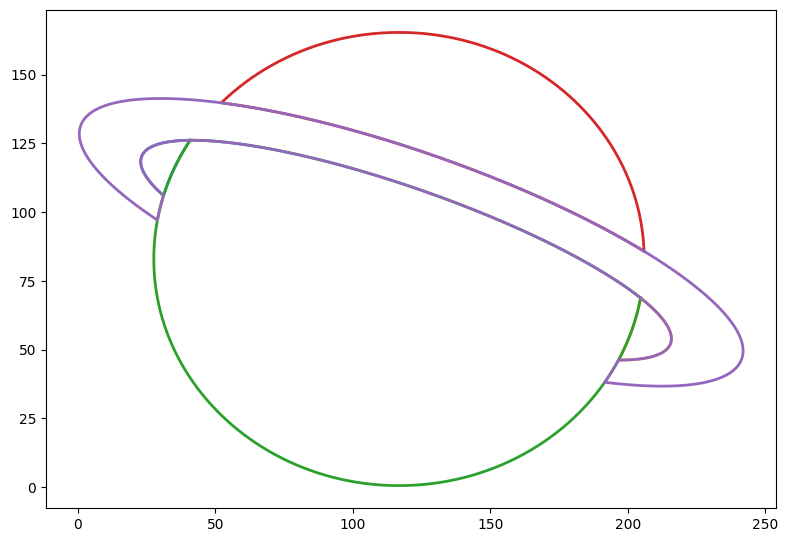

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

def plot(paths_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for XYs in paths_XYs:
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], linewidth=2)
    ax.set_aspect('equal')
    plt.show()

#change the files from the file section
paths_XYs = read_csv('/content/occlusion2.csv')
plot(paths_XYs)


Regualaize the image

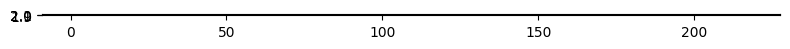

In [6]:
def detect_straight_lines(paths_XYs, tolerance=1e-2):
    straight_lines = []
    for XYs in paths_XYs:
        for XY in XYs:
            if len(XY) < 2:
                continue
            x_diff = np.diff(XY[:, 0])
            y_diff = np.diff(XY[:, 1])
            slopes = np.abs(y_diff / (x_diff + tolerance))
            if np.all(np.abs(slopes - slopes[0]) < tolerance):
                straight_lines.append(XY)
    return straight_lines

def plot_straight_lines(straight_lines):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for XY in straight_lines:
        ax.plot(XY[:, 0], XY[:, 1], 'r-', linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Example usage
straight_lines = detect_straight_lines(paths_XYs)
plot_straight_lines(straight_lines)


Identify Symmetry

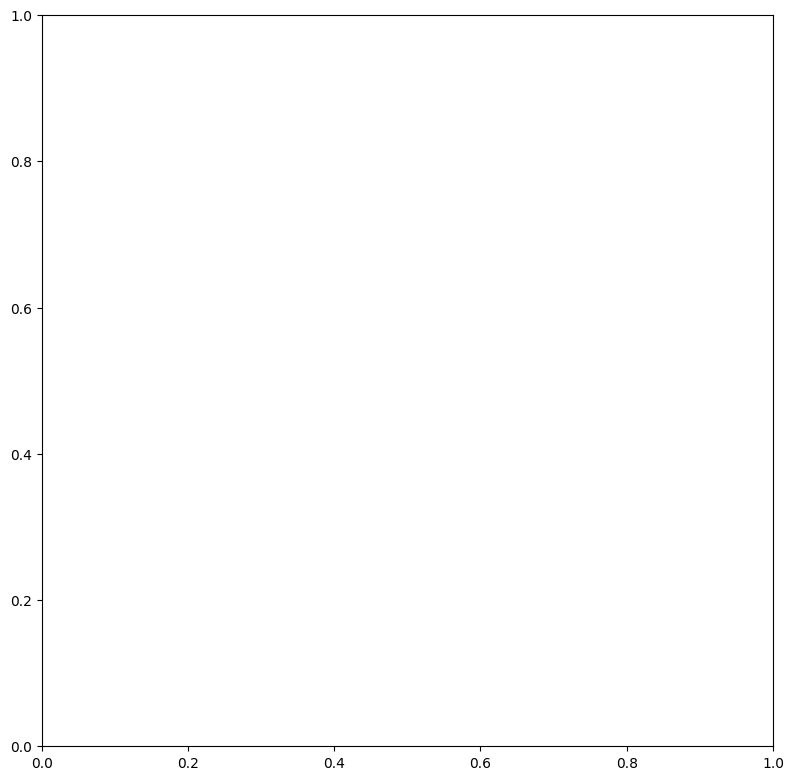

In [7]:
def detect_reflection_symmetry(paths_XYs, tolerance=1e-2):
    symmetric_shapes = []
    for XYs in paths_XYs:
        for XY in XYs:
            if len(XY) < 2:
                continue
            reflected = np.flip(XY, axis=0)
            if np.allclose(XY, reflected, atol=tolerance):
                symmetric_shapes.append(XY)
    return symmetric_shapes

def plot_symmetric_shapes(symmetric_shapes):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for XY in symmetric_shapes:
        ax.plot(XY[:, 0], XY[:, 1], 'g-', linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Example usage
symmetric_shapes = detect_reflection_symmetry(paths_XYs)
plot_symmetric_shapes(symmetric_shapes)


Complete the curves

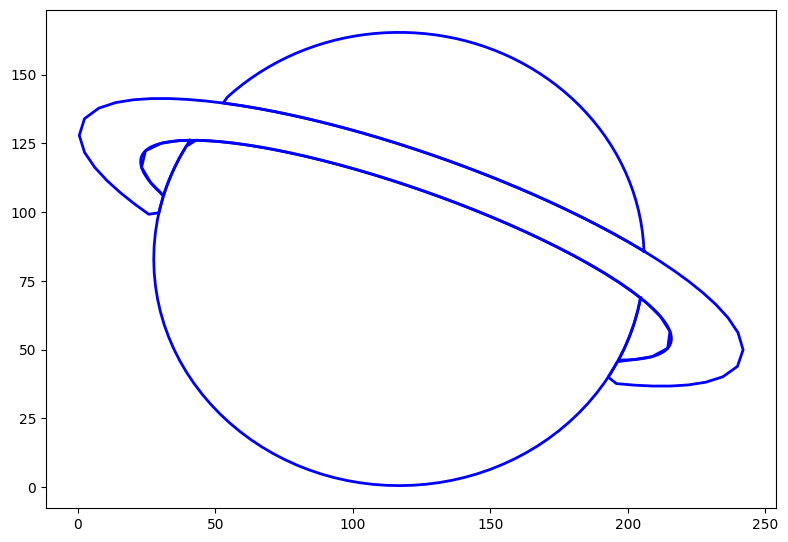

In [10]:
from scipy.interpolate import splprep, splev

def complete_incomplete_curves(paths_XYs, tolerance=1e-2):
    completed_curves = []
    for XYs in paths_XYs:
        for XY in XYs:
            if len(XY) < 2:
                continue
            tck, u = splprep([XY[:, 0], XY[:, 1]], s=0)
            new_points = splev(np.linspace(0, 1, 100), tck)
            completed_curve = np.vstack(new_points).T
            completed_curves.append(completed_curve)
    return completed_curves

def plot_completed_curves(completed_curves):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    for XY in completed_curves:
        ax.plot(XY[:, 0], XY[:, 1], 'b-', linewidth=2)
    ax.set_aspect('equal')
    plt.show()

# Example usage
completed_curves = complete_incomplete_curves(paths_XYs)
plot_completed_curves(completed_curves)


Output the results

In [13]:
import svgwrite
import cairosvg

def save_to_svg(paths_XYs, svg_path):
    dwg = svgwrite.Drawing(svg_path, profile='tiny', size=('800px', '800px')) # Set width and height here
    for XYs in paths_XYs:
        for XY in XYs:
            path_data = "M " + " L ".join(f"{x},{y}" for x, y in XY)
            dwg.add(dwg.path(d=path_data, fill="none", stroke="black"))
    dwg.save()

def save_to_png(svg_path, png_path):
    cairosvg.svg2png(url=svg_path, write_to=png_path)

# Example usage
save_to_svg(paths_XYs, 'output.svg')
save_to_png('output.svg', 'output.png')